                                               Project Name :- Financial Risk Assessment

In [1]:
import pandas as pd

# Load the dataset 
df = pd.read_csv(r'C:\Users\welcome\OneDrive\Desktop\financial_risk_assessment.csv')

# Display the first few rows of the dataset
print(df.head())

   Age      Gender Education Level Marital Status   Income  Credit Score  \
0   49        Male             PhD       Divorced  72799.0         688.0   
1   57      Female      Bachelor's        Widowed      NaN         690.0   
2   21  Non-binary        Master's         Single  55687.0         600.0   
3   59        Male      Bachelor's         Single  26508.0         622.0   
4   25  Non-binary      Bachelor's        Widowed  49427.0         766.0   

   Loan Amount Loan Purpose Employment Status  Years at Current Job  \
0      45713.0     Business        Unemployed                    19   
1      33835.0         Auto          Employed                     6   
2      36623.0         Home          Employed                     8   
3      26541.0     Personal        Unemployed                     2   
4      36528.0     Personal        Unemployed                    10   

  Payment History  Debt-to-Income Ratio  Assets Value  Number of Dependents  \
0            Poor              0.1543

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\welcome\OneDrive\Desktop\financial_risk_assessment.csv')

# Display the first few rows of the dataset
print("Initial Data:")
print(df.head())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Drop rows with all NaN values
df.dropna(how='all', inplace=True)

# Fill missing values with appropriate values or drop columns/rows if necessary
# For simplicity, let's fill numerical columns with 0 and categorical columns with the mode
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(0, inplace=True)

# Check for duplicate rows
print("\nNumber of duplicate rows: ", df.duplicated().sum())

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Convert data types if necessary
# For example, if a column should be numeric but is stored as a string, convert it
# df['column_name'] = pd.to_numeric(df['column_name'], errors='coerce')

# Optionally, remove outliers
# For example, using z-score or IQR method, here is an example with IQR:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display cleaned data
print("\nCleaned Data:")
print(df.head())

# Save the cleaned data to a new CSV file
df.to_csv(r'C:\Users\welcome\OneDrive\Desktop\financial_risk_assessment.csv', index=False)



Initial Data:
   Age      Gender Education Level Marital Status   Income  Credit Score  \
0   49        Male             PhD       Divorced  72799.0         688.0   
1   57      Female      Bachelor's        Widowed      NaN         690.0   
2   21  Non-binary        Master's         Single  55687.0         600.0   
3   59        Male      Bachelor's         Single  26508.0         622.0   
4   25  Non-binary      Bachelor's        Widowed  49427.0         766.0   

   Loan Amount Loan Purpose Employment Status  Years at Current Job  \
0      45713.0     Business        Unemployed                    19   
1      33835.0         Auto          Employed                     6   
2      36623.0         Home          Employed                     8   
3      26541.0     Personal        Unemployed                     2   
4      36528.0     Personal        Unemployed                    10   

  Payment History  Debt-to-Income Ratio  Assets Value  Number of Dependents  \
0            Poor      

In [3]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv(r'C:\Users\welcome\OneDrive\Desktop\financial_risk_assessment.csv')

# Display the first few rows of the dataset
print("Cleaned Data:")
print(df.head())

# Generate descriptive statistics for numerical columns
print("\nDescriptive Statistics (Numerical Columns):")
print(df.describe())

# Generate descriptive statistics for categorical columns
print("\nDescriptive Statistics (Categorical Columns):")
print(df.describe(include=['object']))

# Get the count of unique values in each categorical column
print("\nUnique Value Counts (Categorical Columns):")
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}:")
    print(df[column].value_counts())
    print()

# Check the correlation between numerical features
print("\nCorrelation Matrix (Numerical Columns):")
print(df.corr())


Cleaned Data:
   Age      Gender Education Level Marital Status   Income  Credit Score  \
0   49        Male             PhD       Divorced  72799.0         688.0   
1   57      Female      Bachelor's        Widowed      0.0         690.0   
2   21  Non-binary        Master's         Single  55687.0         600.0   
3   59        Male      Bachelor's         Single  26508.0         622.0   
4   25  Non-binary      Bachelor's        Widowed  49427.0         766.0   

   Loan Amount Loan Purpose Employment Status  Years at Current Job  \
0      45713.0     Business        Unemployed                    19   
1      33835.0         Auto          Employed                     6   
2      36623.0         Home          Employed                     8   
3      26541.0     Personal        Unemployed                     2   
4      36528.0     Personal        Unemployed                    10   

  Payment History  Debt-to-Income Ratio  Assets Value  Number of Dependents  \
0            Poor      

C:\Users\welcome\AppData\Local\Temp\ipykernel_17084\3505630875.py:27: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


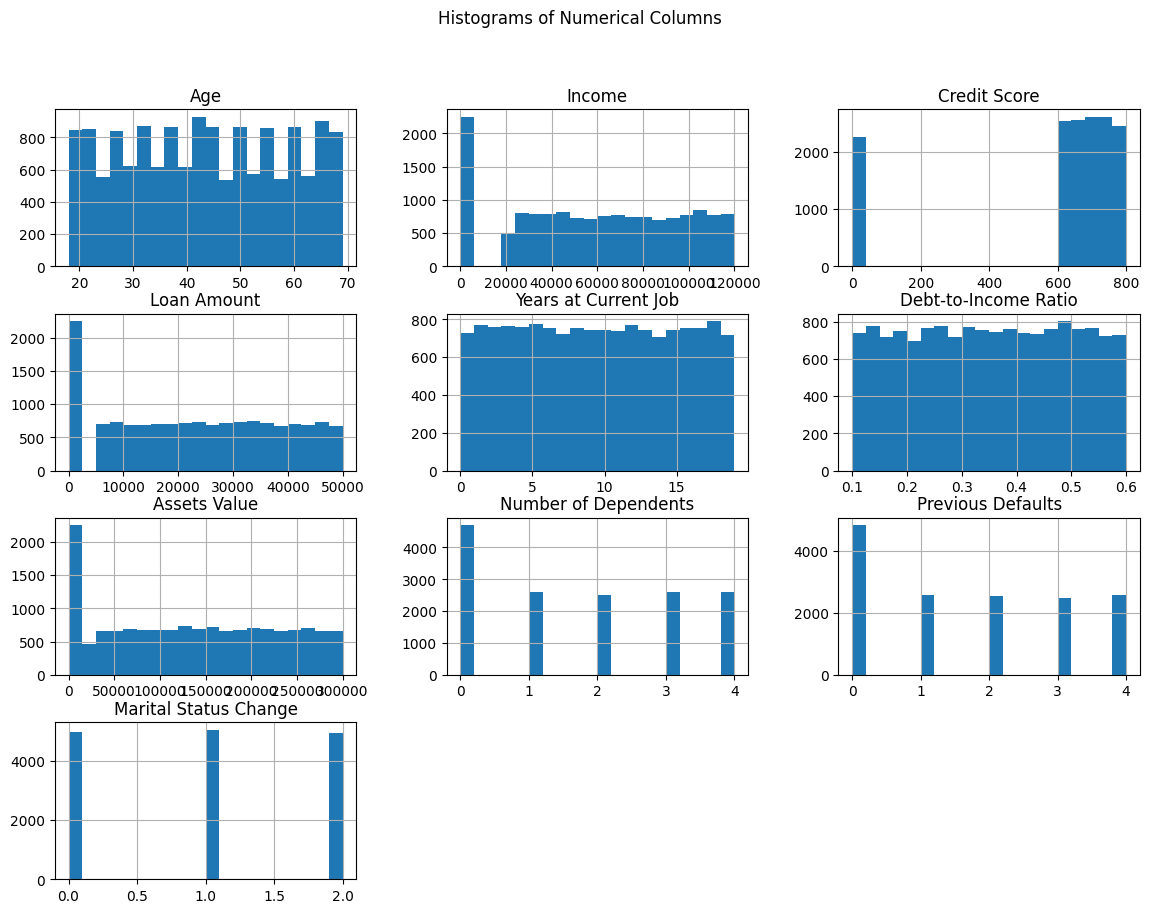

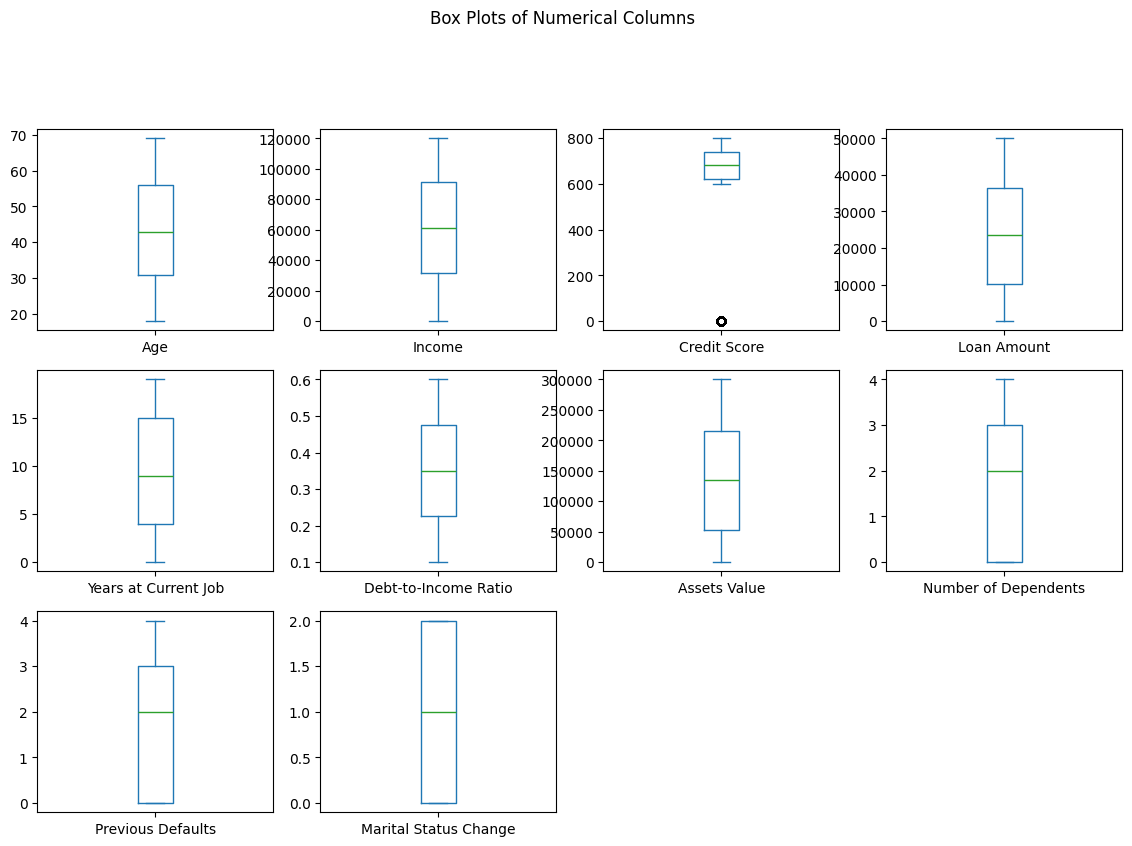

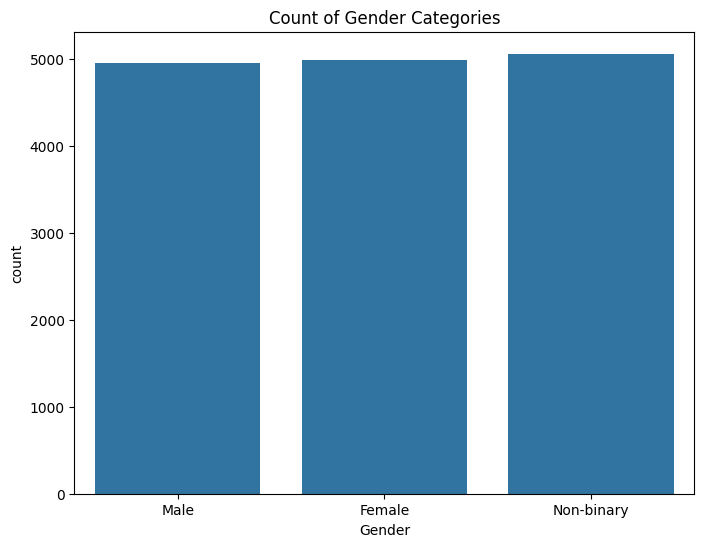

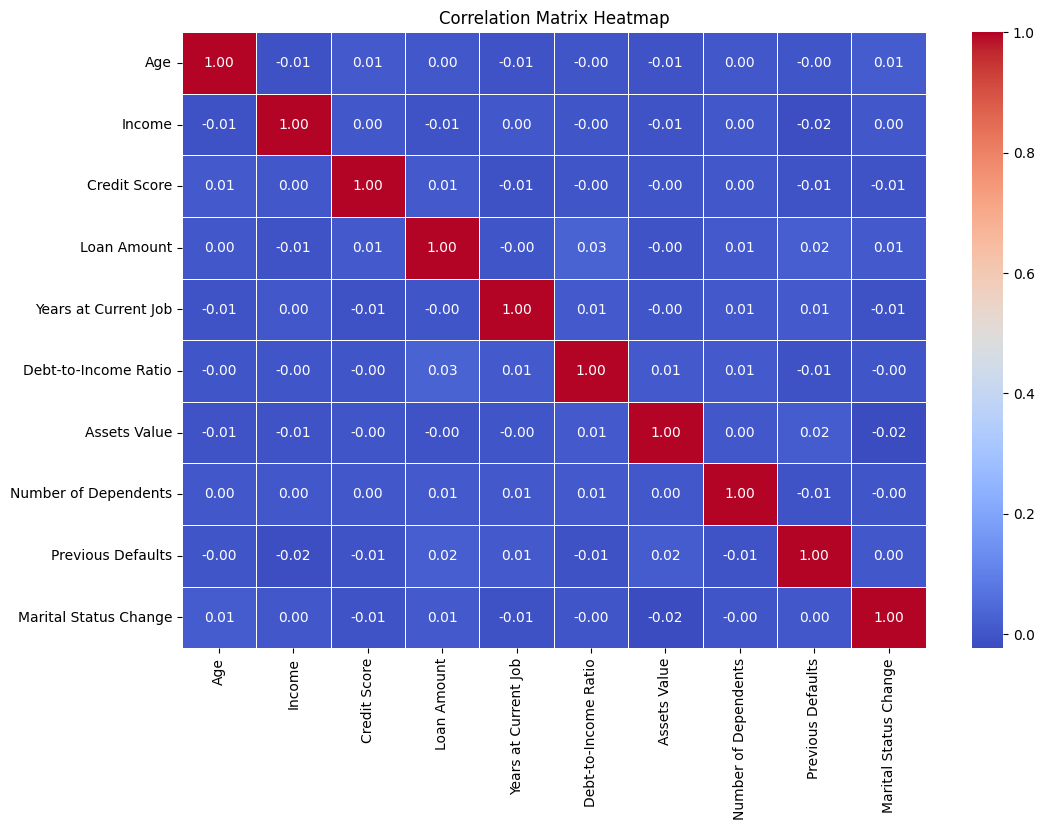

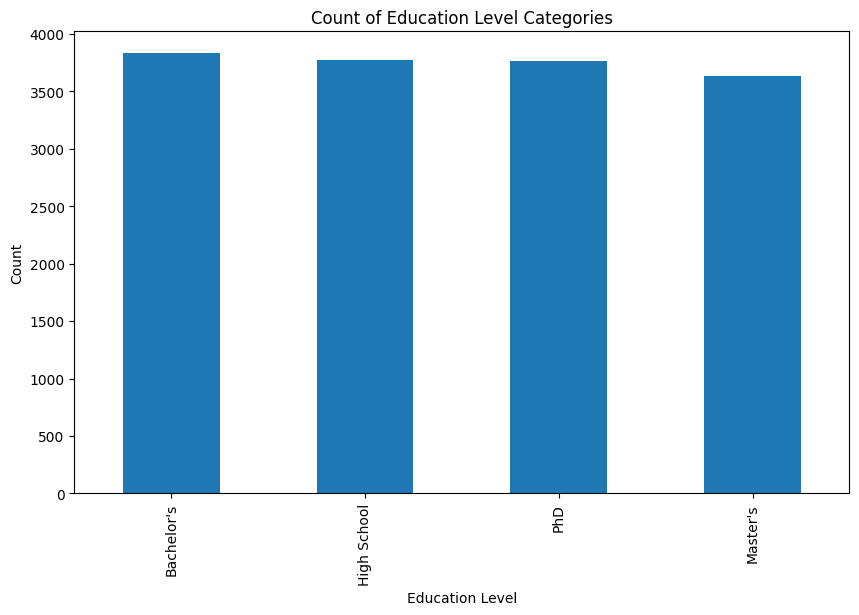

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv(r'C:\Users\welcome\OneDrive\Desktop\financial_risk_assessment.csv')

# Histogram for numerical columns
df.hist(bins=20, figsize=(14, 10))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

# Box plot for numerical columns to visualize outliers
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(14, 12), sharex=False, sharey=False)
plt.suptitle('Box Plots of Numerical Columns')
plt.show()

# Bar plot for a categorical column (e.g., Gender)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender')
plt.title('Count of Gender Categories')
plt.show()

# Correlation matrix heatmap for numerical columns
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Bar plot for the count of unique values in a categorical column (e.g., Education Level)
plt.figure(figsize=(10, 6))
df['Education Level'].value_counts().plot(kind='bar')
plt.title('Count of Education Level Categories')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


<Figure size 1200x800 with 0 Axes>

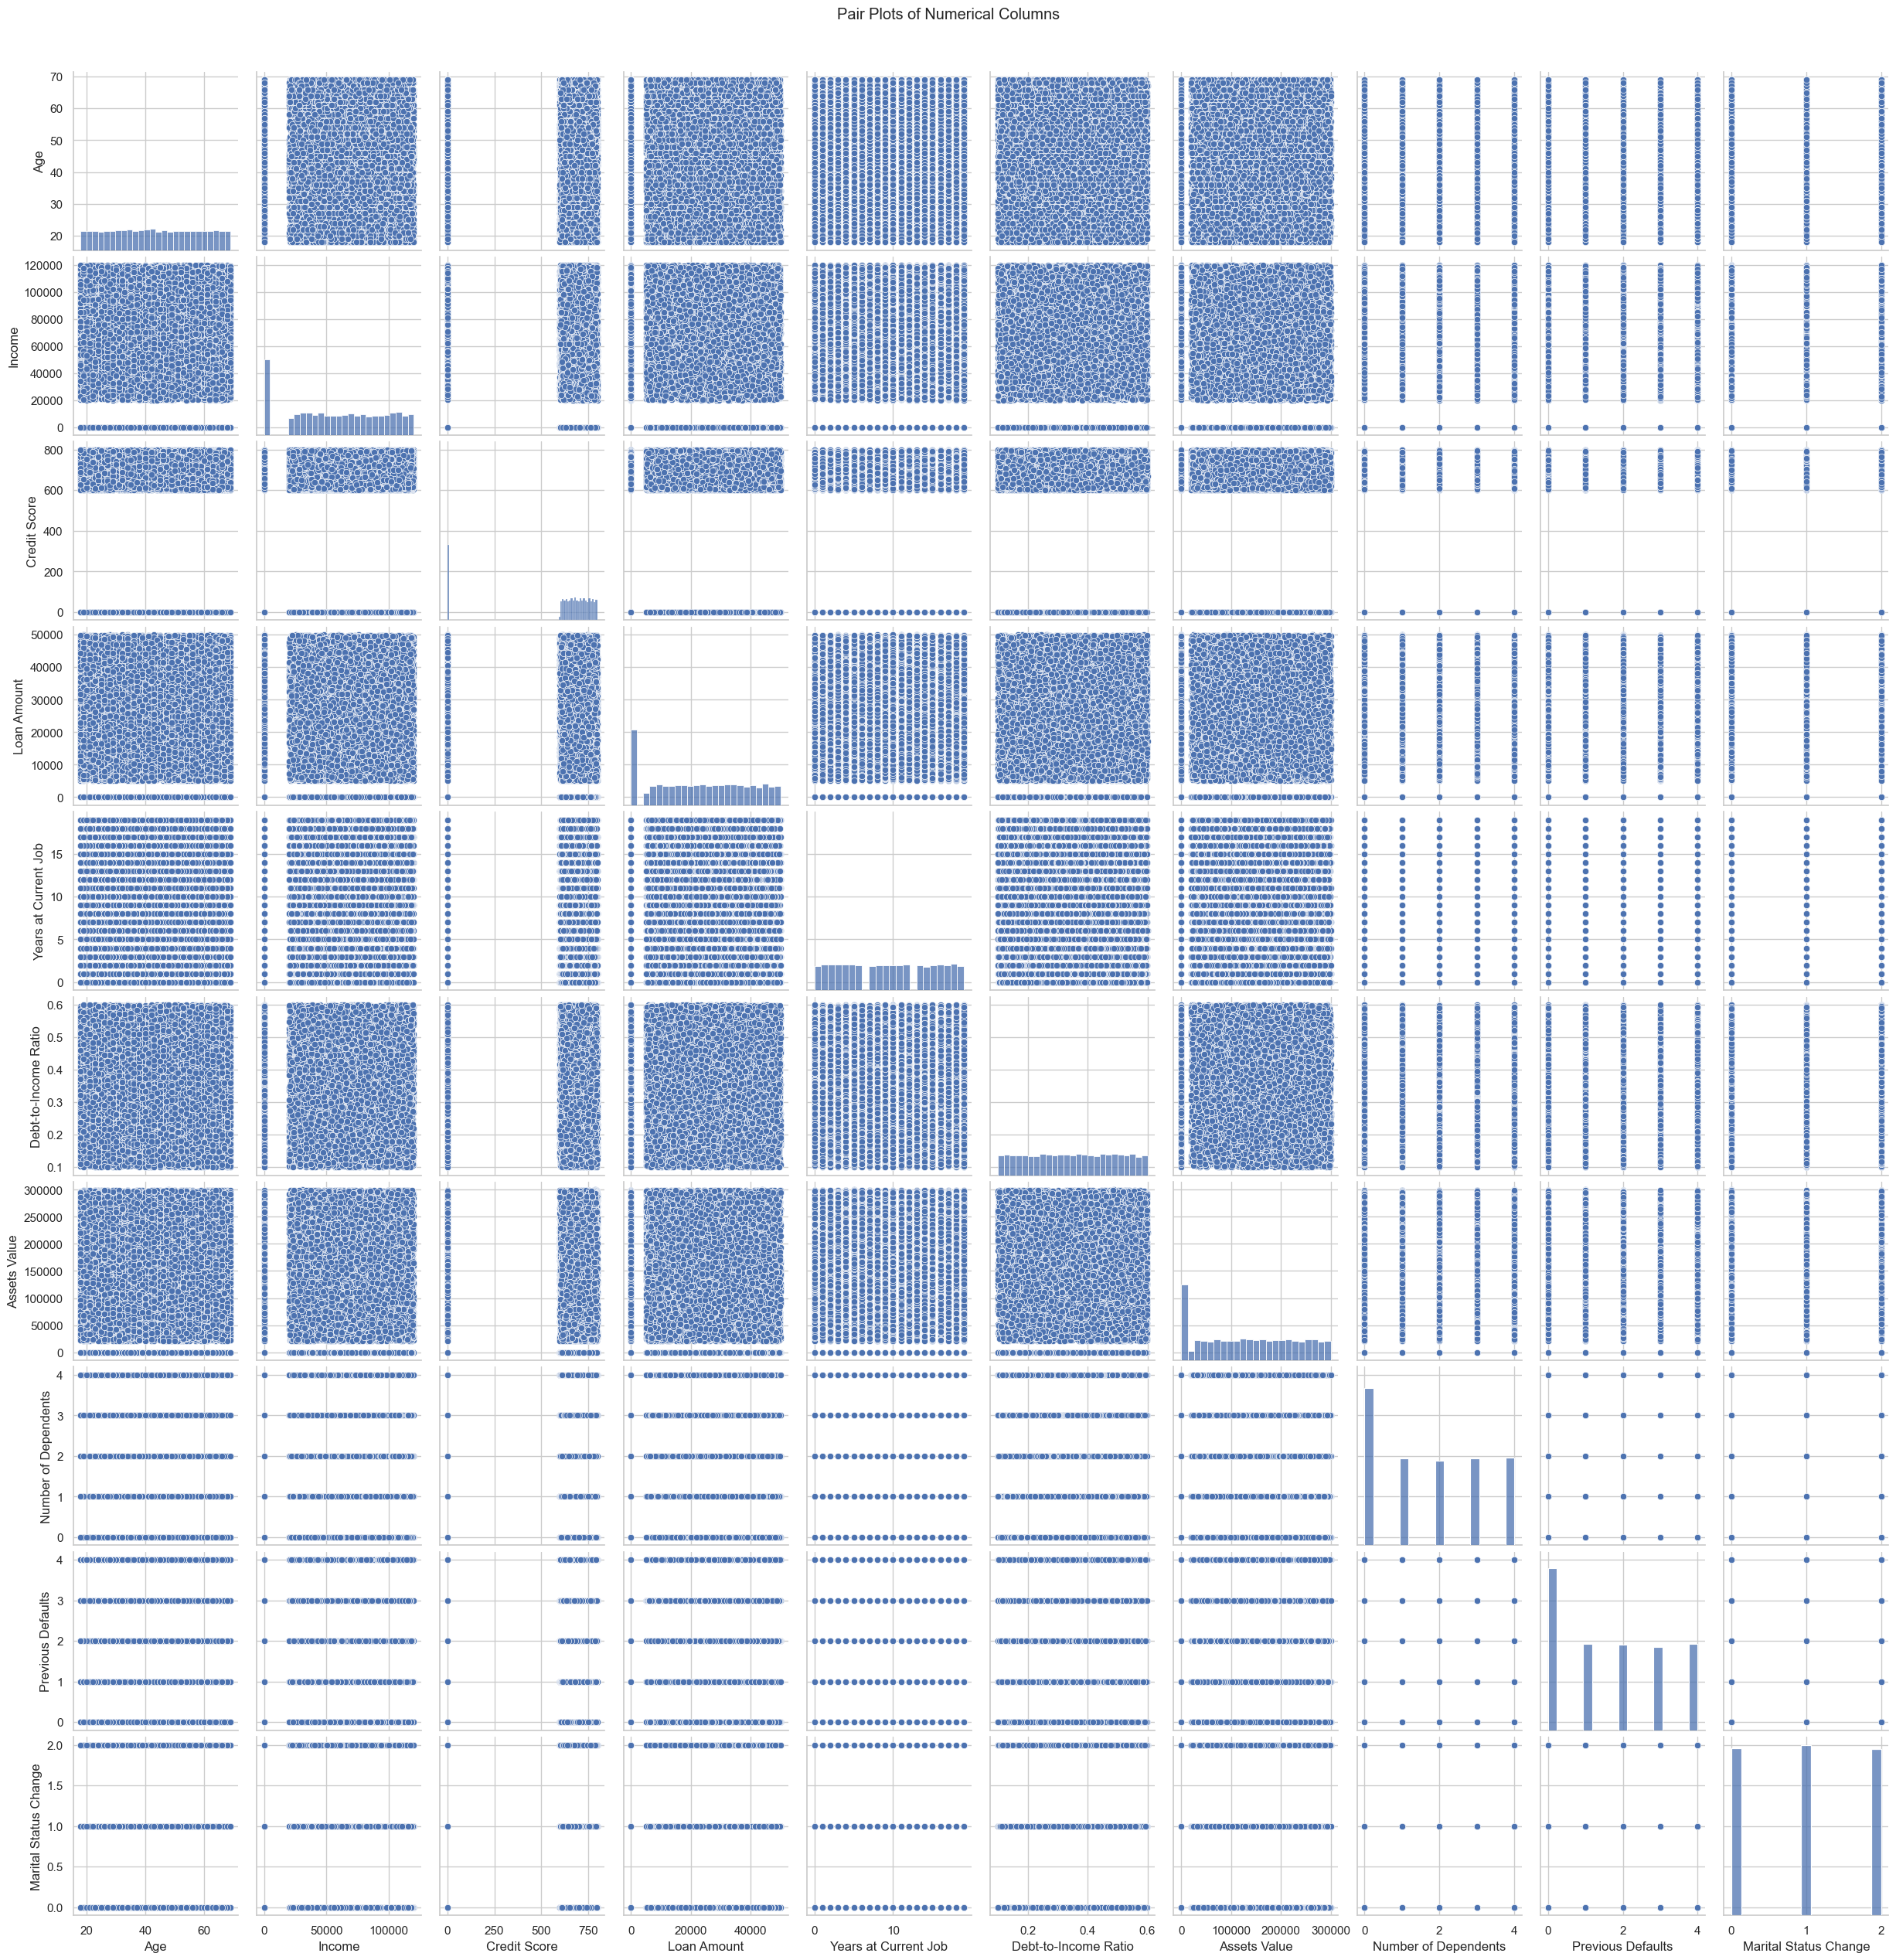

<Figure size 1200x800 with 0 Axes>

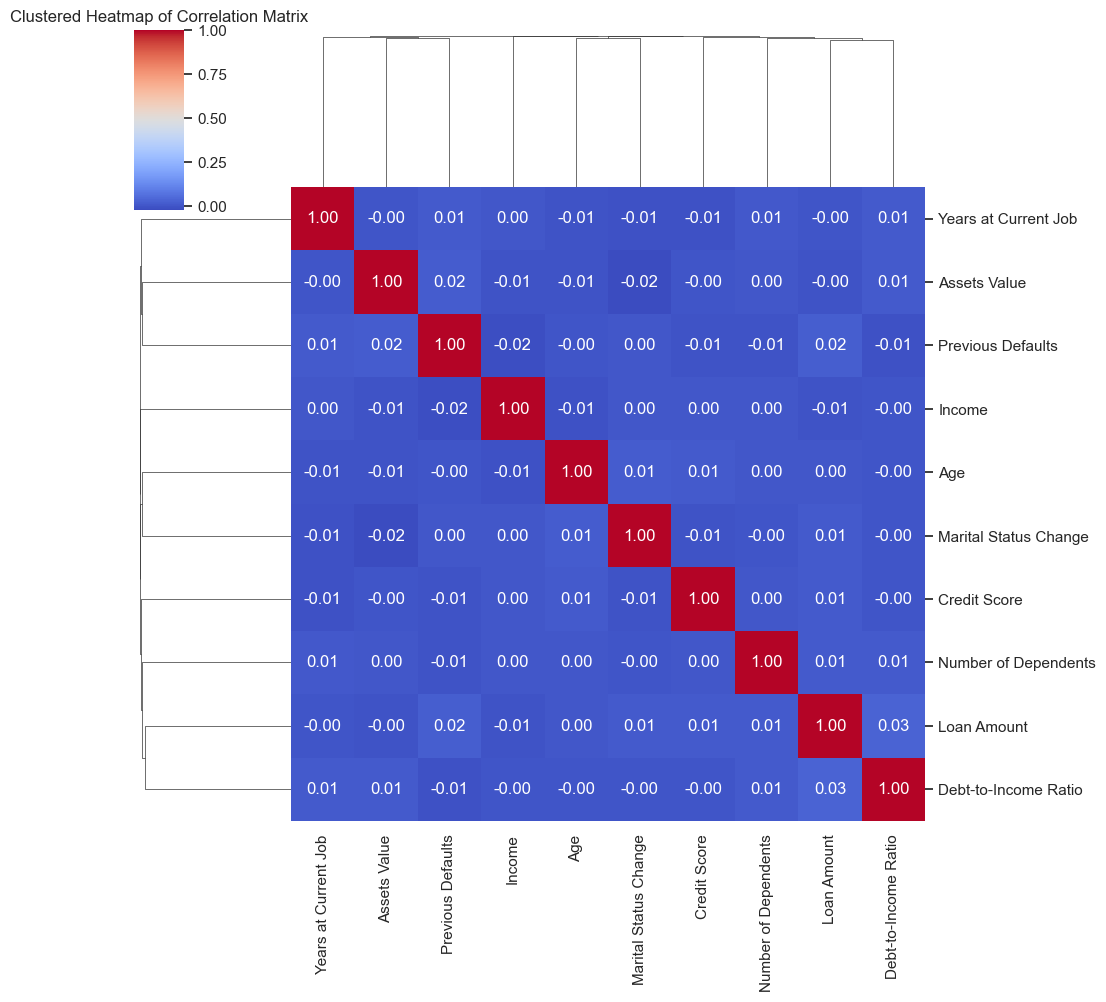

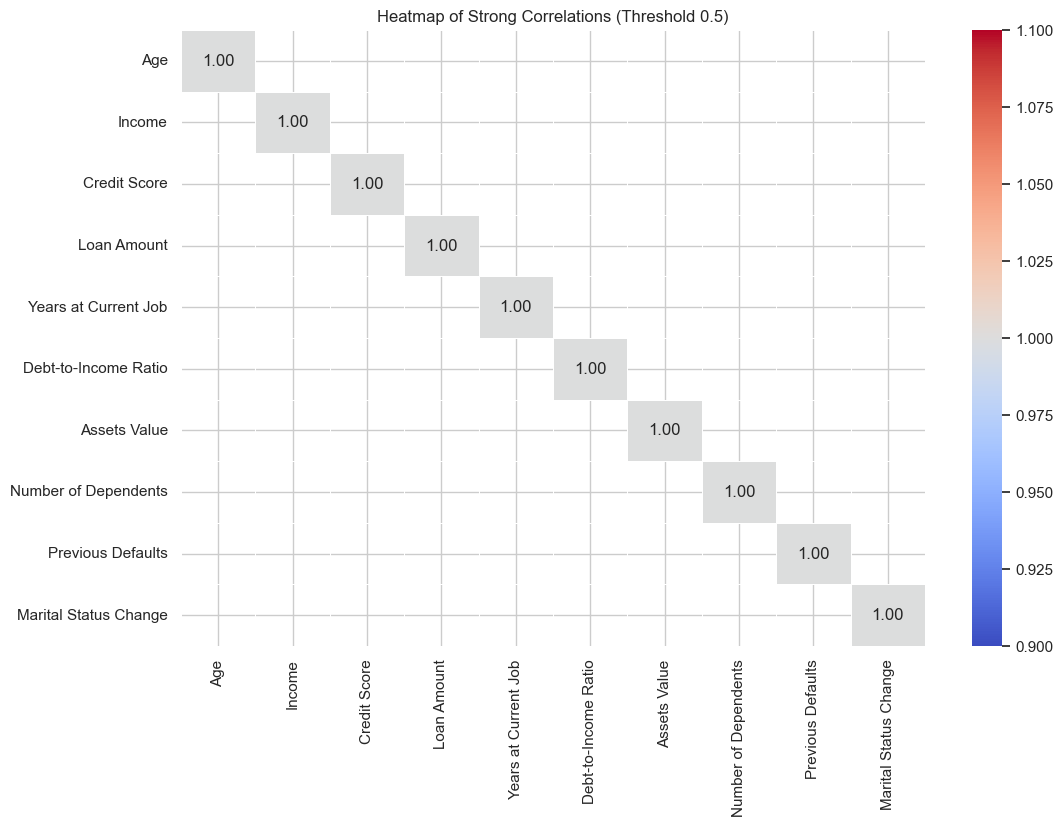

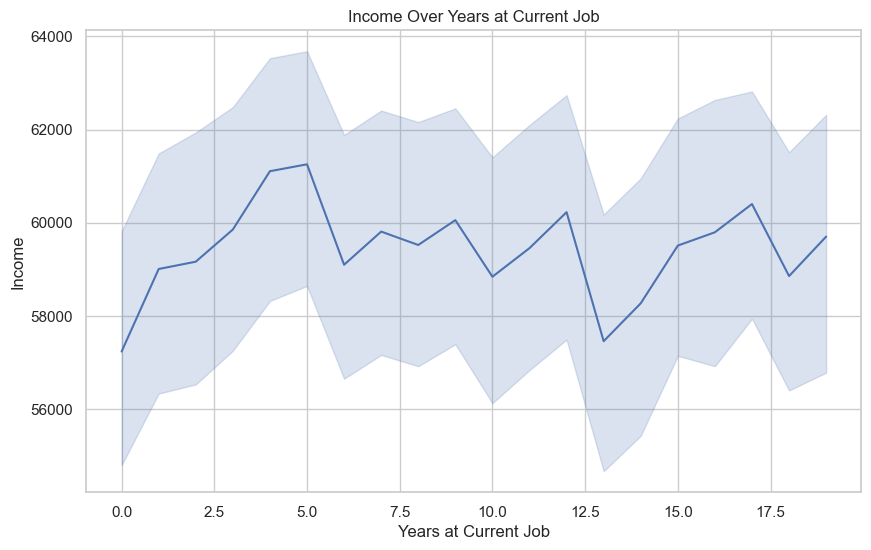

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv(r'C:\Users\welcome\OneDrive\Desktop\financial_risk_assessment.csv')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. Pair Plots of Numerical Columns
plt.figure(figsize=(12, 8))
sns.pairplot(df)
plt.suptitle('Pair Plots of Numerical Columns', y=1.02)
plt.show()

# 2. Clustered Heatmap of Correlation Matrix
plt.figure(figsize=(12, 8))
sns.clustermap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Clustered Heatmap of Correlation Matrix')
plt.show()

# 3. Heatmap of Strong Correlations (Threshold 0.5)
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
strong_corr = corr_matrix[(corr_matrix >= 0.5) | (corr_matrix <= -0.5)]
sns.heatmap(strong_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Strong Correlations (Threshold 0.5)')
plt.show()

# 4. Pair Plots Colored by Risk Level (if applicable)
if 'Risk Level' in df.columns:
    plt.figure(figsize=(12, 8))
    sns.pairplot(df, hue='Risk Level', palette='coolwarm')
    plt.suptitle('Pair Plots Colored by Risk Level', y=1.02)
    plt.show()

# 5. Time Series Plot of Income Over Years at Current Job (if applicable)
if 'Years at Current Job' in df.columns and 'Income' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Years at Current Job', y='Income', data=df)
    plt.title('Income Over Years at Current Job')
    plt.show()

# 6. Count Plot of Education Level by Risk Level (if applicable)
if 'Education Level' in df.columns and 'Risk Level' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.catplot(x="Education Level", hue="Risk Level", kind="count", data=df, palette="coolwarm")
    plt.title('Count Plot of Education Level by Risk Level')
    plt.show()

# 7. Box Plot of Income by Risk Level (if applicable)
if 'Risk Level' in df.columns and 'Income' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Risk Level', y='Income', data=df, palette="coolwarm")
    plt.title('Box Plot of Income by Risk Level')
    plt.show()


In [7]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Dummy data for testing
df_test = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Non-binary'],
    'Education': ['PhD', 'Bachelor', 'Master'],
    'Income': [70000, 80000, 120000]
})

# Handling missing values
num_cols_test = df_test.select_dtypes(include=['float64', 'int64']).columns
cat_cols_test = df_test.select_dtypes(include=['object']).columns

# Imputation (if needed)
imputer_test = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), num_cols_test),
        ('cat', SimpleImputer(strategy='most_frequent'), cat_cols_test)
    ])

df_imputed_test = pd.DataFrame(imputer_test.fit_transform(df_test), columns=num_cols_test.tolist() + cat_cols_test.tolist())

# Encoding
encoder_test = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), cat_cols_test)
    ],
    remainder='passthrough'
)

transformed_data = encoder_test.fit_transform(df_imputed_test)

# Inspect the result
print("Transformed Data Shape:", transformed_data.shape)
print("Feature Names:", encoder_test.get_feature_names_out())


Transformed Data Shape: (3, 5)
Feature Names: ['cat__Gender_Male' 'cat__Gender_Non-binary' 'cat__Education_Master'
 'cat__Education_PhD' 'remainder__Income']


In [11]:
print("Transformed Data Shape:", df_transformed.shape)
print("Sample Transformed Data (first few rows):")
print(df_transformed[:5])


Transformed Data Shape: (15000, 10939)
Sample Transformed Data (first few rows):
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 86 stored elements and shape (5, 10939)>
  Coords	Values
  (0, 0)	1.0
  (0, 4)	1.0
  (0, 8)	1.0
  (0, 12)	1.0
  (0, 15)	1.0
  (0, 7215)	1.0
  (0, 10631)	1.0
  (0, 10741)	1.0
  (0, 10929)	0.3720486980124721
  (0, 10930)	0.36397330502620695
  (0, 10931)	0.3674643017100233
  (0, 10932)	1.4488675217935711
  (0, 10933)	1.6506991185052526
  (0, 10934)	-1.362786773050123
  (0, 10935)	-0.1664163307135155
  (0, 10936)	-1.1570065901667765
  (0, 10937)	0.20598958023156272
  (0, 10938)	1.2307549494549632
  (1, 7)	1.0
  (1, 13)	1.0
  (1, 6092)	1.0
  (1, 10668)	1.0
  (1, 10909)	1.0
  (1, 10929)	0.9085929085820748
  (1, 10930)	-1.6199787660208573
  :	:
  (3, 10932)	0.20771117456234314
  (3, 10933)	-1.2958223801986133
  (3, 10934)	0.7263085349418903
  (3, 10935)	0.23047409689479462
  (3, 10936)	0.8580602322461404
  (3, 10937)	1.5505690856595178
  (3, 10938)	1.2

In [12]:
# Check if encoded categorical feature names are correct
encoded_cat_feature_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_cols)
print("Encoded Categorical Feature Names:")
print(encoded_cat_feature_names)


Encoded Categorical Feature Names:
['Gender_Male' 'Gender_Non-binary' 'Education Level_High School' ...
 'Country_Yemen' 'Country_Zambia' 'Country_Zimbabwe']


In [14]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Load the cleaned dataset
df = pd.read_csv(r'C:\Users\welcome\OneDrive\Desktop\financial_risk_assessment.csv')

# Identify categorical and numerical columns
cat_cols = ['Gender', 'Education Level', 'Marital Status', 'Loan Purpose',
            'Employment Status', 'Payment History', 'City', 'State', 'Country']
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Impute missing values and encode categorical variables
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=True))
])

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine pipelines into a single ColumnTransformer
preprocessor = ColumnTransformer([
    ('cat', cat_pipeline, cat_cols),
    ('num', num_pipeline, num_cols)
])

# Apply the transformations
df_transformed = preprocessor.fit_transform(df)

# Retrieve feature names
encoded_cat_feature_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_cols)

# Combine with numerical feature names
all_feature_names = list(encoded_cat_feature_names) + num_cols

# Convert sparse matrix to dense DataFrame if needed
df_dense = pd.DataFrame(df_transformed.toarray(), columns=all_feature_names)

print("Transformed Data Shape:", df_dense.shape)
print("Feature Names:", df_dense.columns.tolist())
print("Transformed DataFrame Head:")
print(df_dense.head())


Transformed Data Shape: (15000, 10939)
Feature Names: ['Gender_Male', 'Gender_Non-binary', 'Education Level_High School', "Education Level_Master's", 'Education Level_PhD', 'Marital Status_Married', 'Marital Status_Single', 'Marital Status_Widowed', 'Loan Purpose_Business', 'Loan Purpose_Home', 'Loan Purpose_Personal', 'Employment Status_Self-employed', 'Employment Status_Unemployed', 'Payment History_Fair', 'Payment History_Good', 'Payment History_Poor', 'City_Aaronchester', 'City_Aaronhaven', 'City_Aaronmouth', 'City_Aaronport', 'City_Aaronshire', 'City_Aaronstad', 'City_Aaronton', 'City_Aaronview', 'City_Abbotthaven', 'City_Abbottmouth', 'City_Abbottville', 'City_Abigailchester', 'City_Abigailtown', 'City_Acostamouth', 'City_Acostashire', 'City_Acostaton', 'City_Adamburgh', 'City_Adambury', 'City_Adamfurt', 'City_Adamhaven', 'City_Adamland', 'City_Adammouth', 'City_Adamport', 'City_Adamsberg', 'City_Adamsborough', 'City_Adamsburgh', 'City_Adamschester', 'City_Adamsfurt', 'City_Adams

In [17]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Load the cleaned dataset
df = pd.read_csv(r'C:\Users\welcome\OneDrive\Desktop\financial_risk_assessment.csv')

# Identify categorical and numerical columns
cat_cols = ['Gender', 'Education Level', 'Marital Status', 'Loan Purpose',
            'Employment Status', 'Payment History', 'City', 'State', 'Country']
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Impute missing values and encode categorical variables
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=True))
])

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())  # Apply StandardScaler for standardization
])

# Combine pipelines into a single ColumnTransformer
preprocessor = ColumnTransformer([
    ('cat', cat_pipeline, cat_cols),
    ('num', num_pipeline, num_cols)
])

# Apply the transformations
df_transformed = preprocessor.fit_transform(df)

# Convert sparse matrix to dense array
df_dense_array = df_transformed.toarray()

# Retrieve feature names
encoded_cat_feature_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_cols)
all_feature_names = list(encoded_cat_feature_names) + num_cols

# Convert to DataFrame
df_dense = pd.DataFrame(df_dense_array, columns=all_feature_names)

# Apply normalization to the entire DataFrame
normalizer = MinMaxScaler()
df_dense_normalized = pd.DataFrame(normalizer.fit_transform(df_dense), columns=all_feature_names)

print("Transformed Data Shape:", df_dense_normalized.shape)
print("Feature Names:", df_dense_normalized.columns.tolist())
print("Transformed DataFrame Head:")
print(df_dense_normalized.head())


Transformed Data Shape: (15000, 10939)
Feature Names: ['Gender_Male', 'Gender_Non-binary', 'Education Level_High School', "Education Level_Master's", 'Education Level_PhD', 'Marital Status_Married', 'Marital Status_Single', 'Marital Status_Widowed', 'Loan Purpose_Business', 'Loan Purpose_Home', 'Loan Purpose_Personal', 'Employment Status_Self-employed', 'Employment Status_Unemployed', 'Payment History_Fair', 'Payment History_Good', 'Payment History_Poor', 'City_Aaronchester', 'City_Aaronhaven', 'City_Aaronmouth', 'City_Aaronport', 'City_Aaronshire', 'City_Aaronstad', 'City_Aaronton', 'City_Aaronview', 'City_Abbotthaven', 'City_Abbottmouth', 'City_Abbottville', 'City_Abigailchester', 'City_Abigailtown', 'City_Acostamouth', 'City_Acostashire', 'City_Acostaton', 'City_Adamburgh', 'City_Adambury', 'City_Adamfurt', 'City_Adamhaven', 'City_Adamland', 'City_Adammouth', 'City_Adamport', 'City_Adamsberg', 'City_Adamsborough', 'City_Adamsburgh', 'City_Adamschester', 'City_Adamsfurt', 'City_Adams

In [18]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Load the cleaned dataset
df = pd.read_csv(r'C:\Users\welcome\OneDrive\Desktop\financial_risk_assessment.csv')

# Identify categorical and numerical columns
cat_cols = ['Gender', 'Education Level', 'Marital Status', 'Loan Purpose',
            'Employment Status', 'Payment History', 'City', 'State', 'Country']
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Impute missing values and encode categorical variables
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with the most frequent value
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=True))  # One-hot encoding
])

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with the mean
    ('scaler', StandardScaler())  # Standardize numerical features
])

# Combine pipelines into a single ColumnTransformer
preprocessor = ColumnTransformer([
    ('cat', cat_pipeline, cat_cols),  # Apply cat_pipeline to categorical columns
    ('num', num_pipeline, num_cols)   # Apply num_pipeline to numerical columns
])

# Apply the transformations
df_transformed = preprocessor.fit_transform(df)

# Convert sparse matrix to dense array
df_dense_array = df_transformed.toarray()

# Retrieve feature names for categorical columns
encoded_cat_feature_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_cols)

# Combine feature names
all_feature_names = list(encoded_cat_feature_names) + num_cols

# Convert to DataFrame
df_dense = pd.DataFrame(df_dense_array, columns=all_feature_names)

print("Transformed Data Shape:", df_dense.shape)
print("Feature Names:", df_dense.columns.tolist())
print("Transformed DataFrame Head:")
print(df_dense.head())


Transformed Data Shape: (15000, 10939)
Feature Names: ['Gender_Male', 'Gender_Non-binary', 'Education Level_High School', "Education Level_Master's", 'Education Level_PhD', 'Marital Status_Married', 'Marital Status_Single', 'Marital Status_Widowed', 'Loan Purpose_Business', 'Loan Purpose_Home', 'Loan Purpose_Personal', 'Employment Status_Self-employed', 'Employment Status_Unemployed', 'Payment History_Fair', 'Payment History_Good', 'Payment History_Poor', 'City_Aaronchester', 'City_Aaronhaven', 'City_Aaronmouth', 'City_Aaronport', 'City_Aaronshire', 'City_Aaronstad', 'City_Aaronton', 'City_Aaronview', 'City_Abbotthaven', 'City_Abbottmouth', 'City_Abbottville', 'City_Abigailchester', 'City_Abigailtown', 'City_Acostamouth', 'City_Acostashire', 'City_Acostaton', 'City_Adamburgh', 'City_Adambury', 'City_Adamfurt', 'City_Adamhaven', 'City_Adamland', 'City_Adammouth', 'City_Adamport', 'City_Adamsberg', 'City_Adamsborough', 'City_Adamsburgh', 'City_Adamschester', 'City_Adamsfurt', 'City_Adams

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Load the cleaned dataset
df = pd.read_csv(r'C:\Users\welcome\OneDrive\Desktop\financial_risk_assessment.csv')

# Define features and target
X = df.drop('Risk Rating', axis=1)  # Features
y = df['Risk Rating']  # Target

# Identify categorical and numerical columns
cat_cols = ['Gender', 'Education Level', 'Marital Status', 'Loan Purpose',
            'Employment Status', 'Payment History', 'City', 'State', 'Country']
num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Impute missing values and encode categorical variables
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=True))
])

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine pipelines into a single ColumnTransformer
preprocessor = ColumnTransformer([
    ('cat', cat_pipeline, cat_cols),
    ('num', num_pipeline, num_cols)
])

# Create and apply preprocessing pipeline
X_transformed = preprocessor.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.598

Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00       470
         Low       0.60      1.00      0.75      2692
      Medium       0.44      0.00      0.01      1338

    accuracy                           0.60      4500
   macro avg       0.35      0.33      0.25      4500
weighted avg       0.49      0.60      0.45      4500



C:\Users\welcome\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\welcome\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\welcome\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classi

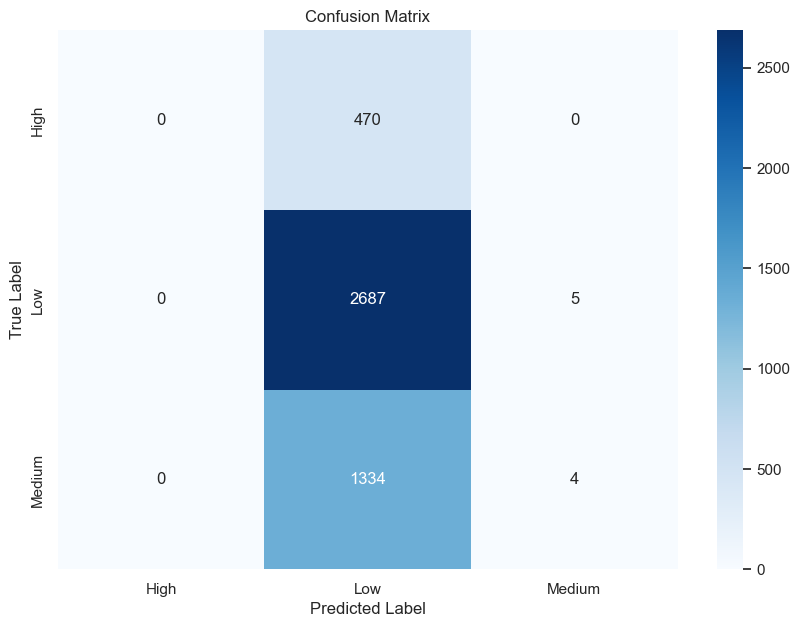

<module 'matplotlib.pyplot' from 'C:\\Users\\welcome\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\matplotlib\\pyplot.py'>

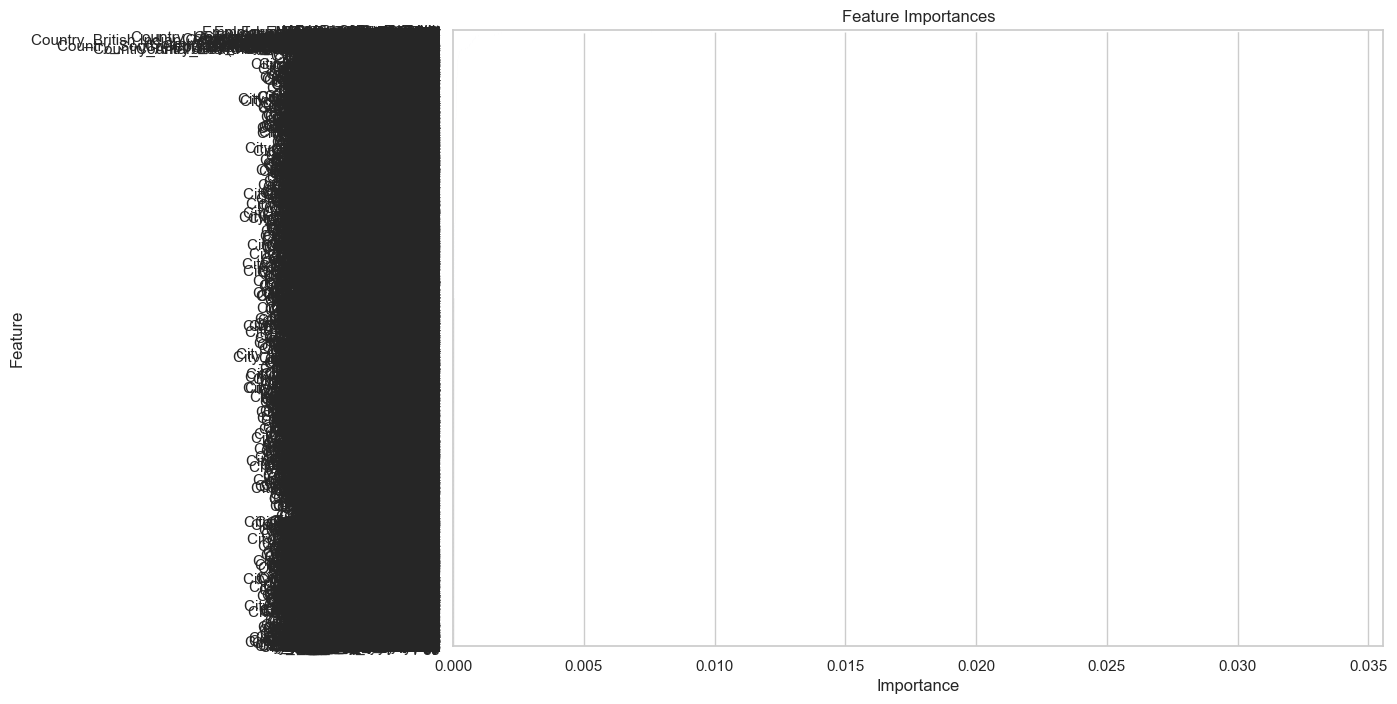

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Add this import statement
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Load the cleaned dataset
df = pd.read_csv(r'C:\Users\welcome\OneDrive\Desktop\financial_risk_assessment.csv')

# Define features and target
X = df.drop('Risk Rating', axis=1)  # Features
y = df['Risk Rating']  # Target

# Identify categorical and numerical columns
cat_cols = ['Gender', 'Education Level', 'Marital Status', 'Loan Purpose',
            'Employment Status', 'Payment History', 'City', 'State', 'Country']
num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Impute missing values and encode categorical variables
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=True))
])

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine pipelines into a single ColumnTransformer
preprocessor = ColumnTransformer([
    ('cat', cat_pipeline, cat_cols),
    ('num', num_pipeline, num_cols)
])

# Create and apply preprocessing pipeline
X_transformed = preprocessor.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Extract feature importances
importances = clf.feature_importances_
encoded_cat_feature_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_cols)

# Combine with numerical feature names
feature_names = np.array(list(encoded_cat_feature_names) + num_cols)

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt



                                       Project Name :  Financial Risk Assessment

### 1. Introduction

The objective of this project was to assess financial risk by analyzing a dataset that includes various customer attributes and loan-related information. The data was used to build a predictive model to evaluate the risk rating of loan applications.

### 2. Data Description

The dataset contains the following features:

- # Categorical Features:
  - Gender
  - Education Level
  - Marital Status
  - Loan Purpose
  - Employment Status
  - Payment History
  - City
  - State
  - Country

- # Numerical Features:
  - Age
  - Income
  - Credit Score
  - Loan Amount
  - Years at Current Job
  - Debt-to-Income Ratio
  - Assets Value
  - Number of Dependents
  - Previous Defaults

The target variable for the model is **Risk Rating**, which is a categorical variable representing the risk level of a loan application.

### 3. Data Preprocessing

#### 3.1. Handling Missing Values

- **Categorical Variables:** Missing values were imputed using the most frequent value within each column.
- **Numerical Variables:** Missing values were imputed with the mean value of the respective columns.

#### 3.2. Encoding Categorical Variables

Categorical features were encoded using One-Hot Encoding to convert them into a format suitable for machine learning models. The `ColumnTransformer` was employed to handle both categorical and numerical data transformations:

- # One-Hot Encoding: Applied to categorical features, excluding the first category to avoid multicollinearity.
- # Feature Scaling: Numerical features were standardized using `StandardScaler` to ensure all features contribute equally to the model.

#### 3.3. Feature Engineering

- Features were transformed into a sparse matrix format and then converted into a dense DataFrame for modeling.

### 4. Machine Learning Model

#### 4.1. Model Selection

- A Random Forest Classifier was chosen for this project due to its robustness and ability to handle both numerical and categorical data effectively. 

#### 4.2. Training and Testing

- The data was split into training (70%) and testing (30%) sets.
- The Random Forest model was trained on the training set and evaluated on the test set.

### 5. Model Evaluation

#### 5.1. Confusion Matrix

The confusion matrix shows the number of true positive, true negative, false positive, and false negative predictions for each class, providing insights into the model's performance.

#### 5.2. Feature Importance

Feature importance scores were calculated to determine which features had the most influence on the model's predictions. 

The chart highlights the features that significantly impact the risk rating predictions.


### 6. Conclusion

The Random Forest Classifier effectively assessed financial risk based on the given dataset. The preprocessing steps, including handling missing values and encoding categorical variables, were crucial for preparing the data for modeling. The evaluation metrics, including the confusion matrix, feature importance, demonstrated the model's performance and the significance of various features.
